In [55]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [165]:
x = pd.read_csv('multiTimeline.csv',header=1)
x = x.replace('<',0, regex=True)
# x = x.astype(int)
# x.plot(figsize=(30,15))
# x

In [168]:
tv_shows = pd.read_csv('tv_shows.csv',usecols=['Title','Year','Age','IMDb','Rotten Tomatoes','Netflix']).dropna().reset_index()
tv_shows = tv_shows.drop(columns='index')
tv_shows.columns = ['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes (%)','Netflix']
tv_shows['Rotten Tomatoes (%)'] = tv_shows['Rotten Tomatoes (%)'].replace('%','', regex=True)
tv_shows['Rotten Tomatoes (%)'] = tv_shows['Rotten Tomatoes (%)'].astype(int)
# tv_shows.Title == 'The Office'
# tv_shows_NF = tv_shows[tv_shows.Netflix == 1]
# tv_shows_NF = tv_shows[tv_shows.Year == 2020]
# tv_shows_NF = tv_shows.drop(tv_shows.Netflix == 0)
tv_shows = tv_shows[tv_shows.Netflix == 1]
tv_shows = tv_shows[tv_shows.Year == 2020]
tv_shows = tv_shows.sort_values(by='IMDb', ascending=False)
tv_shows = tv_shows.reset_index().drop(columns='index')
tv_shows.head(100)

,Title,Year,Age,IMDb,Rotten Tomatoes (%),Netflix
0,Middleditch & Schwartz,2020,18+,8.7,100,1
1,The Midnight Gospel,2020,18+,8.4,90,1
2,The Trials of Gabriel Fernandez,2020,18+,8.2,80,1
3,Cheer,2020,16+,8.2,96,1
4,Unorthodox,2020,18+,8.1,94,1
5,Never Have I Ever,2020,16+,8.0,97,1
6,"Tiger King: Murder, Mayhem and Madness",2020,18+,7.8,86,1
7,Messiah,2020,18+,7.7,44,1
8,Spinning Out,2020,18+,7.7,63,1
9,Hollywood,2020,18+,7.7,57,1


In [111]:
shows_2020 = shows_2020.sort_values(by='IMDb', ascending=False)
shows_2020.sample(10)

,index,Title,Year,Age,IMDb,Rotten Tomatoes (%)
6,129,Locke & Key,2020,16+,7.4,67
23,339,Queen Sono,2020,18+,5.8,100
4,98,Outer Banks,2020,18+,7.6,72
34,510,Mrs. America,2020,18+,7.5,96
49,708,Outmatched,2020,7+,5.6,22
54,812,ZeroZeroZero,2020,18+,8.2,80
48,699,Utopia Falls,2020,7+,4.9,43
17,261,Love is Blind,2020,7+,6.0,73
3,93,I Am Not Okay with This,2020,18+,7.6,85
35,514,Little Fires Everywhere,2020,18+,7.7,77


In [53]:
shows_2020 = tv_shows[tv_shows.Year == 2020].reset_index()
shows_2019 = tv_shows[tv_shows.Year == 2019].reset_index()
shows_2018 = tv_shows[tv_shows.Year == 2018].reset_index()
shows_2017 = tv_shows[tv_shows.Year == 2017].reset_index()
shows_2016 = tv_shows[tv_shows.Year == 2016].reset_index()

In [59]:

recent_5 = pd.concat([shows_2020,
shows_2019,
shows_2018,
shows_2017,
shows_2016],).reset_index().drop(columns=['index','level_0'])
recent_5.Title.value_counts().sample(10)

Indebted                        1
11.22.63                        1
The Widow                       1
The End of the F***ing World    1
The Vietnam War                 1
For Life                        1
Bluff City Law                  1
Sick Note                       1
Making the Cut                  1
American Vandal                 1
Name: Title, dtype: int64

<AxesSubplot:title={'center':'Top 5 Highest Rated IMDb TV Shows of 2016'}, xlabel='Title', ylabel='IMDb'>

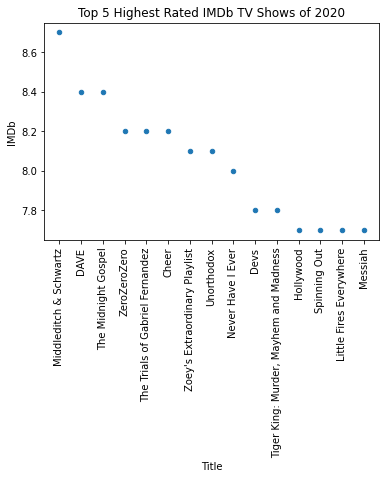

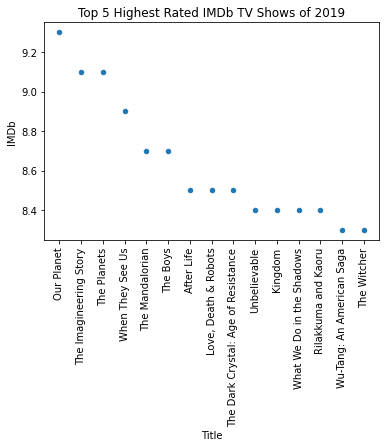

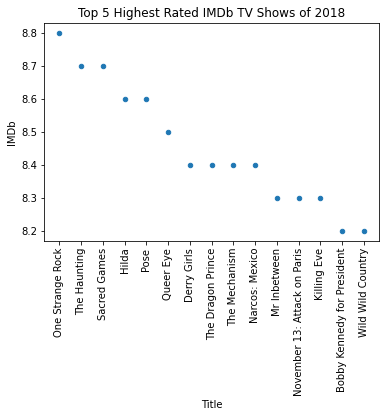

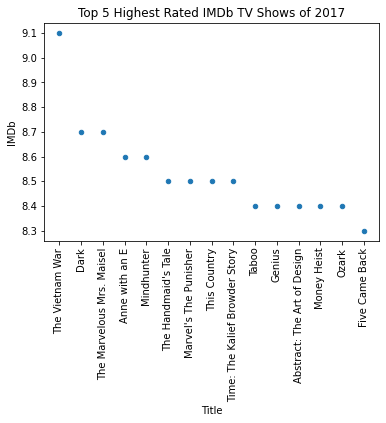

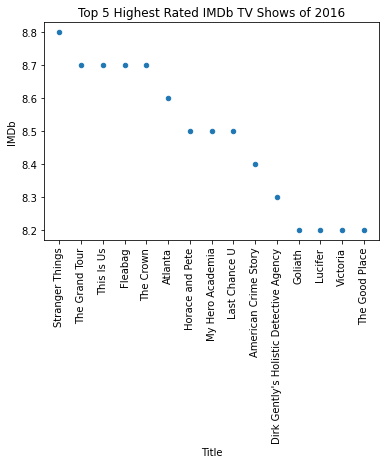

In [12]:
shows_2020.sort_values(by='IMDb',ascending=False).head(15).plot.scatter(x='Title',y='IMDb',title='Top 5 Highest Rated IMDb TV Shows of 2020', rot=90),
shows_2019.sort_values(by='IMDb',ascending=False).head(15).plot.scatter(x='Title',y='IMDb',title='Top 5 Highest Rated IMDb TV Shows of 2019', rot=90),
shows_2018.sort_values(by='IMDb',ascending=False).head(15).plot.scatter(x='Title',y='IMDb',title='Top 5 Highest Rated IMDb TV Shows of 2018', rot=90),
shows_2017.sort_values(by='IMDb',ascending=False).head(15).plot.scatter(x='Title',y='IMDb',title='Top 5 Highest Rated IMDb TV Shows of 2017', rot=90),
shows_2016.sort_values(by='IMDb',ascending=False).head(15).plot.scatter(x='Title',y='IMDb',title='Top 5 Highest Rated IMDb TV Shows of 2016', rot=90)

In [18]:
# shows_2020.sort_values(by='Rotten Tomatoes (%)',ascending=False).head(15).plot.scatter(x='Title',y='Rotten Tomatoes (%)',title='Top 5 Highest Rated Rotten Tomatoes (%) TV Shows of 2020', rot=90),
# shows_2019.sort_values(by='Rotten Tomatoes (%)',ascending=False).head(15).plot.scatter(x='Title',y='Rotten Tomatoes (%)',title='Top 5 Highest Rated Rotten Tomatoes (%) TV Shows of 2019', rot=90),
# shows_2018.sort_values(by='Rotten Tomatoes (%)',ascending=False).head(15).plot.scatter(x='Title',y='Rotten Tomatoes (%)',title='Top 5 Highest Rated Rotten Tomatoes (%) TV Shows of 2018', rot=90),
# shows_2017.sort_values(by='Rotten Tomatoes (%)',ascending=False).head(15).plot.scatter(x='Title',y='Rotten Tomatoes (%)',title='Top 5 Highest Rated Rotten Tomatoes (%) TV Shows of 2017', rot=90),
# shows_2016.sort_values(by='Rotten Tomatoes (%)',ascending=False).head(15).plot.scatter(x='Title',y='Rotten Tomatoes (%)',title='Top 5 Highest Rated Rotten Tomatoes (%) TV Shows of 2016', rot=90)

In [33]:
# tv_shows[tv_shows['Title'] == 'Breaking Bad']
# tv_shows.Year.value_counts()
# yr_db = tv_shows[['Year','IMDb']]
# yr_db[yr_db['Year'] == 2020].tail().IMDb.sort_values(ascending=True).dropna().plot.bar(y='IMDb',figsize=(30,15))

,Title,Year,Age,IMDb,Rotten Tomatoes (%)
0,Breaking Bad,2008,18+,9.5,96
